## Immunotherapy Dataset Data Set

### This dataset contains information about wart treatment results of 90 patients using immunotherapy.

Dataset Characeteristics: Univariate <br>
Attribute Characteristics: Integer, Real <br>
Number of Instances: 90 <br>
Number of Attributes: 8 <br>
Missing Values: No 
	

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics as m
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import pandas as pd
import itertools

header = ["sex","age","time","warts nr", "type", "area",
          "induration", "result of treatment"]
immun_raw = pd.read_csv("./Immunotherapy/Immunotherapy.csv", sep = ";", names = header, header=0)
print(immun_raw.head(n=15))
immun = immun_raw.values


    sex  age   time  warts nr  type  area  induration  result of treatment
0     1   22   2.25        14     3    51          50                    1
1     1   15   3.00         2     3   900          70                    1
2     1   16  10.50         2     1   100          25                    1
3     1   27   4.50         9     3    80          30                    1
4     1   20   8.00         6     1    45           8                    1
5     1   15   5.00         3     3    84           7                    1
6     1   35   9.75         2     2     8           6                    1
7     2   28   7.50         4     1     9           2                    1
8     2   19   6.00         2     1   225           8                    1
9     2   32  12.00         6     3    35           5                    0
10    2   33   6.25         2     1    30           3                    1
11    2   17   5.75        12     3    25           7                    1
12    2   15   1.75      

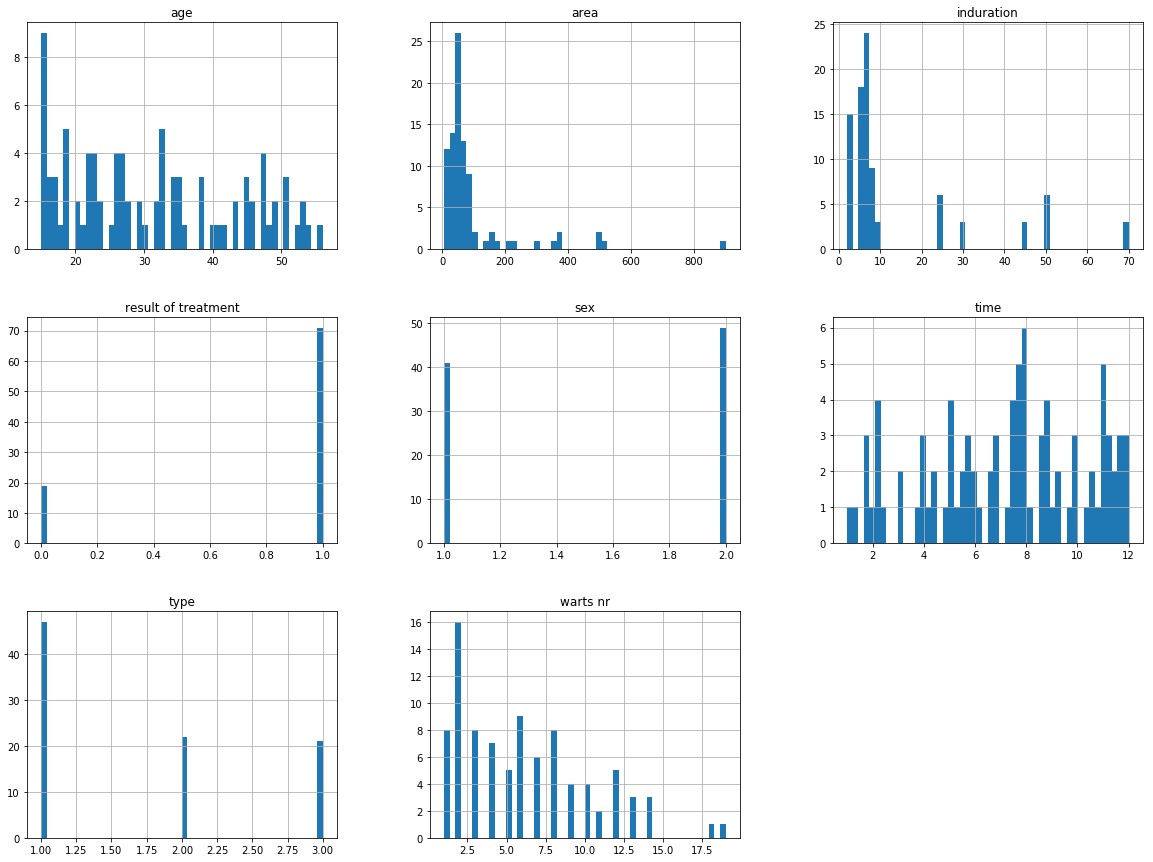

In [95]:
immun_raw.hist(bins = 50, figsize = (20,15))
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
# splitting in training and testing
X = immun[:,0:7]
y = immun[:,7]
immun_input, immun_input_test, immun_target, immun_target_test = train_test_split(X, y, test_size=0.2)

In [97]:
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [98]:
def plot_results(cnf_matrix, immun_target_test, prediction, title='Confusion matrix'):
    class_names = ["Did not Work","Worked"]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=title)
    plt.show()
    print(" Accuracy:\t %.3f" % m.accuracy_score(immun_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(immun_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(immun_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(immun_target_test, prediction))

In [99]:
def get_pd_overview(cv_results):
    pd_results = pd.DataFrame(grid_search.cv_results_)
    params = pd_results.loc[:,"params"]
    mean_test_scores = pd_results.loc[:,"mean_test_score"]
    frames = [mean_test_scores, params]
    overview = pd.concat(frames,  axis=1)
    return overview

In [100]:
from sklearn import tree

## DECISION TREE

param_grid = [
  {'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(immun_input, immun_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)



In [101]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

   mean_test_score                                     params
0         0.844176      {'criterion': 'gini', 'max_depth': 1}
1         0.788938      {'criterion': 'gini', 'max_depth': 5}
2         0.719267     {'criterion': 'gini', 'max_depth': 10}
3         0.788938     {'criterion': 'gini', 'max_depth': 50}
4         0.844176   {'criterion': 'entropy', 'max_depth': 1}
5         0.759267   {'criterion': 'entropy', 'max_depth': 5}
6         0.747985  {'criterion': 'entropy', 'max_depth': 10}
7         0.718315  {'criterion': 'entropy', 'max_depth': 50}

Best parameters:  {'criterion': 'gini', 'max_depth': 1}


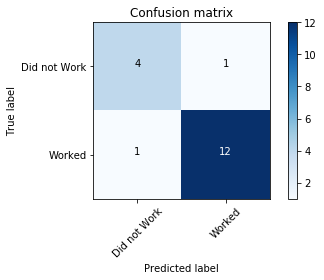

 Accuracy:	 0.889
 Precision:	 0.923
 Sensitivity:	 0.923
 F1:		 0.923


In [102]:
# use best parameters for model
clf = grid_search.best_estimator_

prediction = clf.predict(immun_input_test)
cnf_matrix = m.confusion_matrix(immun_target_test, prediction)

plot_results(cnf_matrix, immun_target_test, prediction)

In [103]:
from sklearn.ensemble import RandomForestClassifier

## RANDOM FOREST

rand_forest = RandomForestClassifier()
param_grid = [
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

grid_search = GridSearchCV(rand_forest, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(immun_input, immun_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [104]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                                             params
0          0.806374  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
1          0.806374  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
2          0.806374  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
3          0.833040  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
4          0.793040  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
5          0.793040  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
6          0.819707  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
7          0.806374  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
8          0.806374  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
9          0.820659  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
10         0.833993  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
11         0.819707  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
12         0.806374  {'criterion': 'entropy', 'max_depth': 1, 'n_es...
13    

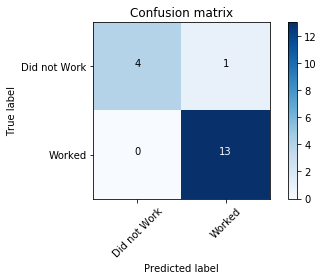

 Accuracy:	 0.944
 Precision:	 0.929
 Sensitivity:	 1.000
 F1:		 0.963


In [105]:
# use best parameters for model
rand_forest = grid_search.best_estimator_

prediction = rand_forest.predict(immun_input_test)
cnf_matrix = m.confusion_matrix(immun_target_test, prediction)

plot_results(cnf_matrix, immun_target_test, prediction)

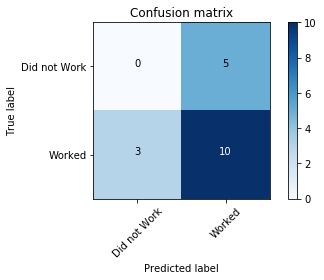

 Accuracy:	 0.556
 Precision:	 0.667
 Sensitivity:	 0.769
 F1:		 0.714


In [106]:
from sklearn.naive_bayes import GaussianNB

## GAUSSIAN NAIVE BAYES

gnb = GaussianNB()
gnb.fit(immun_input,immun_target)

prediction = gnb.predict(immun_input_test)
cnf_matrix = m.confusion_matrix(immun_target_test, prediction)

plot_results(cnf_matrix, immun_target_test, prediction)

In [107]:
from sklearn.svm import SVC

## SUPPORT VECTOR MACHINE

svcl = SVC();
param_grid = [
  {'gamma': [0.001, 0.01, 0.1, 1.0],'C': [0.1, 1, 10, 100, 1000], 'kernel': ["rbf"]}
 ]

grid_search = GridSearchCV(svcl, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(immun_input, immun_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [108]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                                        params
0          0.806374   {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1          0.806374    {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
2          0.806374     {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
3          0.806374     {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
4          0.806374     {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
5          0.790989      {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
6          0.806374       {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
7          0.806374       {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
8          0.708938    {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
9          0.733553     {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
10         0.806374      {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
11         0.806374      {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
12         0.694505   {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
13         0.733553    {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
14        

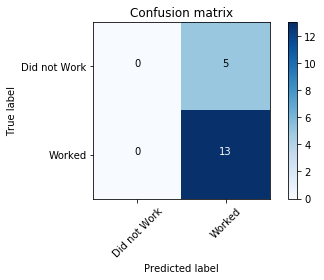

 Accuracy:	 0.722
 Precision:	 0.722
 Sensitivity:	 1.000
 F1:		 0.839


In [109]:
# use best parameters for model
svcl = grid_search.best_estimator_

prediction = svcl.predict(immun_input_test)
cnf_matrix = m.confusion_matrix(immun_target_test, prediction)

plot_results(cnf_matrix, immun_target_test, prediction)